In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import requests 
import json

In [2]:
# Import libraries for choropleth formatting

from branca.element import Template, MacroElement
import webbrowser
from folium import Choropleth, GeoJsonTooltip

In [3]:
# Create path

path=r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
# Import google search data frame

df = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'gsearch_st_aggs_updated.csv'), index_col=0)

In [5]:
merge_df = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'gmerge_alb_groups_sums.csv'), index_col=0)

In [6]:
merge_df.head()

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num,tv,state_num,...,pop_sum,pop_norm,rock_sum,rock_norm,alt_sum,alt_norm,always_ts,originals,taylorsversions,upcoming
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,1439.050,287.810,1025,256.25,487,243.5,1030.250,1346,846.8,433
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,1317.800,263.560,848,212.00,447,223.5,988.000,1022,866.8,361
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,1413.975,282.795,942,235.50,524,262.0,1065.375,1111,864.6,388
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,1496.425,299.285,1061,265.25,492,246.0,1042.625,1348,917.8,471
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,1397.750,279.550,925,231.25,494,247.0,1009.750,911,985.0,339


In [7]:
df.head(20)

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,...,alb_num,tv,state_num,alb_genre,alb_group_st_search_avg,st_overall_search_avg,st_group_alb_search_avg,tvflag,state alb popularity group,sales_group
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,1,Country pop,19,52,21,False,Low search popularity,Low first week sales
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,2,Country pop,19,46,16,False,Low search popularity,Low first week sales
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,3,Country pop,19,49,15,False,Low search popularity,Low first week sales
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,4,Country pop,19,54,30,False,Low search popularity,Low first week sales
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,5,Country pop,19,46,6,False,Low search popularity,Low first week sales
5,"2006/09/28-2006/10/10, Colorado",2006/09/28-2006/10/10,2006-09-28,Colorado,7,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,6,Country pop,19,54,16,False,Low search popularity,Low first week sales
6,"2006/09/28-2006/10/10, Connecticut",2006/09/28-2006/10/10,2006-09-28,Connecticut,0,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,7,Country pop,19,63,9,False,Low search popularity,Low first week sales
7,"2006/09/28-2006/10/10, Delaware",2006/09/28-2006/10/10,2006-09-28,Delaware,0,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,8,Country pop,19,54,17,False,Low search popularity,Low first week sales
8,"2006/09/28-2006/10/10, District of Columbia",2006/09/28-2006/10/10,2006-09-28,District of Columbia,0,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,9,Country pop,19,68,4,False,Low search popularity,Low first week sales
9,"2006/09/28-2006/10/10, Florida",2006/09/28-2006/10/10,2006-09-28,Florida,6,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,10,Country pop,19,41,12,False,Low search popularity,Low first week sales


In [8]:
df['album_id'].value_counts(dropna=False)

album_id
MIDN       408
DEBUT      255
SPEAK      255
1989       255
REP        255
SPEAKTV    255
EVER       255
FEARTV     255
FOLK       255
LOVE       255
REDTV      255
RED        255
FEAR       255
1989TV     204
Name: count, dtype: int64

In [9]:
df.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'state alb popularity group',
       'sales_group'],
      dtype='object')

In [10]:
df1 = df[['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg']]

In [11]:
pop_genres = df.loc[df['album_id'].isin(["MIDN", "1989", "REP", "LOVE", "1989TV"])]

In [12]:
pop_genres.head()

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,...,alb_num,tv,state_num,alb_genre,alb_group_st_search_avg,st_overall_search_avg,st_group_alb_search_avg,tvflag,state alb popularity group,sales_group
510,"2014/10/01-2014/10/13, Alabama",2014/10/01-2014/10/13,2014-10-01,Alabama,59,1989,1989,2014-10-27,Monday,-2,...,5,original,1,Synth/Dream/Dance pop,67,52,67,False,High search popularity,High first week sales
511,"2014/10/01-2014/10/13, Alaska",2014/10/01-2014/10/13,2014-10-01,Alaska,52,1989,1989,2014-10-27,Monday,-2,...,5,original,2,Synth/Dream/Dance pop,67,46,52,False,Medium search popularity,High first week sales
512,"2014/10/01-2014/10/13, Arizona",2014/10/01-2014/10/13,2014-10-01,Arizona,61,1989,1989,2014-10-27,Monday,-2,...,5,original,3,Synth/Dream/Dance pop,67,49,62,False,Medium search popularity,High first week sales
513,"2014/10/01-2014/10/13, Arkansas",2014/10/01-2014/10/13,2014-10-01,Arkansas,69,1989,1989,2014-10-27,Monday,-2,...,5,original,4,Synth/Dream/Dance pop,67,54,72,False,High search popularity,High first week sales
514,"2014/10/01-2014/10/13, California",2014/10/01-2014/10/13,2014-10-01,California,52,1989,1989,2014-10-27,Monday,-2,...,5,original,5,Synth/Dream/Dance pop,67,46,63,False,Medium search popularity,High first week sales


In [13]:
pop_genres.shape

(1377, 26)

In [14]:
pop_sub = pop_genres[['g_search_score', 
      'periods_from_release', 'us_search_avg',
       'global_search_avg', 'wk1_alb_sales', 'streams_normal', 'alb_num', 'state_num',
       'st_overall_search_avg','st_group_alb_search_avg']]

In [15]:
pop_sub.corr()

,g_search_score,periods_from_release,us_search_avg,global_search_avg,wk1_alb_sales,streams_normal,alb_num,state_num,st_overall_search_avg,st_group_alb_search_avg
g_search_score,1.000000,7.853329e-02,3.257667e-01,3.228767e-01,8.426160e-02,-8.469101e-02,-2.328808e-01,6.246213e-02,6.143334e-01,0.785201
periods_from_release,0.078533,1.000000e+00,9.275150e-02,2.595958e-01,-5.150388e-02,-6.225712e-02,-2.773704e-01,1.610740e-16,-3.805078e-16,0.110897
us_search_avg,0.325767,9.275150e-02,1.000000e+00,9.148554e-01,2.802775e-02,-1.236756e-01,-2.852705e-01,-2.019304e-17,9.226364e-18,0.115359
global_search_avg,0.322877,2.595958e-01,9.148554e-01,1.000000e+00,-6.535108e-02,-1.139189e-01,-2.779670e-01,1.603339e-16,1.545515e-16,0.102665
wk1_alb_sales,0.084262,-5.150388e-02,2.802775e-02,-6.535108e-02,1.000000e+00,4.154061e-01,2.228085e-01,-5.220799e-16,5.013409e-16,0.106116
streams_normal,-0.084691,-6.225712e-02,-1.236756e-01,-1.139189e-01,4.154061e-01,1.000000e+00,7.475408e-01,6.031176e-17,4.202433e-16,-0.107241
alb_num,-0.232881,-2.773704e-01,-2.852705e-01,-2.779670e-01,2.228085e-01,7.475408e-01,1.000000e+00,-2.138376e-16,7.021403e-16,-0.298638
state_num,0.062462,1.610740e-16,-2.019304e-17,1.603339e-16,-5.220799e-16,6.031176e-17,-2.138376e-16,1.000000e+00,1.446118e-01,0.077443
st_overall_search_avg,0.614333,-3.805078e-16,9.226364e-18,1.545515e-16,5.013409e-16,4.202433e-16,7.021403e-16,1.446118e-01,1.000000e+00,0.781370
st_group_alb_search_avg,0.785201,1.108970e-01,1.153594e-01,1.026651e-01,1.061160e-01,-1.072407e-01,-2.986378e-01,7.744313e-02,7.813696e-01,1.000000


In [16]:
df1

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,us_search_avg,wk1_alb_sales,streams_normal,alb_num,tv,state_num,alb_genre,alb_group_st_search_avg,st_overall_search_avg,st_group_alb_search_avg
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,39000,187127,1,original,1,Country pop,19,52,21
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,39000,187127,1,original,2,Country pop,19,46,16
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,69,39000,187127,1,original,3,Country pop,19,49,15
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,69,39000,187127,1,original,4,Country pop,19,54,30
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,69,39000,187127,1,original,5,Country pop,19,46,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,"2023/11/08-2023/11/21, Virginia",2023/11/08-2023/11/21,2023-11-09,Virginia,59,1989 (Taylor's Version),1989TV,2023-10-27,Friday,1,69,1359000,112484136,14,Taylor's Version,47,Synth/Dream/Dance pop,60,48,54
3668,"2023/11/08-2023/11/21, Washington",2023/11/08-2023/11/21,2023-11-09,Washington,63,1989 (Taylor's Version),1989TV,2023-10-27,Friday,1,69,1359000,112484136,14,Taylor's Version,48,Synth/Dream/Dance pop,60,53,60
3669,"2023/11/08-2023/11/21, West Virginia",2023/11/08-2023/11/21,2023-11-09,West Virginia,63,1989 (Taylor's Version),1989TV,2023-10-27,Friday,1,69,1359000,112484136,14,Taylor's Version,49,Synth/Dream/Dance pop,60,56,59
3670,"2023/11/08-2023/11/21, Wisconsin",2023/11/08-2023/11/21,2023-11-09,Wisconsin,56,1989 (Taylor's Version),1989TV,2023-10-27,Friday,1,69,1359000,112484136,14,Taylor's Version,50,Synth/Dream/Dance pop,60,56,59


In [17]:
merge_df.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_su

In [18]:
merge_trio_pop = merge_df.loc[merge_df['album_id'].isin(['1989', '1989TV', 'REP'])]

In [19]:
merge_trio_pop

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num,tv,state_num,...,pop_sum,pop_norm,rock_sum,rock_norm,alt_sum,alt_norm,always_ts,originals,taylorsversions,upcoming
510,Alabama,59,1989,1989,2014-10-27,-2,81,5,original,1,...,1439.050,287.810,1025,256.25,487,243.5,1030.250,1346,846.8,433
511,Alaska,52,1989,1989,2014-10-27,-2,81,5,original,2,...,1317.800,263.560,848,212.00,447,223.5,988.000,1022,866.8,361
512,Arizona,61,1989,1989,2014-10-27,-2,81,5,original,3,...,1413.975,282.795,942,235.50,524,262.0,1065.375,1111,864.6,388
513,Arkansas,69,1989,1989,2014-10-27,-2,81,5,original,4,...,1496.425,299.285,1061,265.25,492,246.0,1042.625,1348,917.8,471
514,California,52,1989,1989,2014-10-27,-2,81,5,original,5,...,1397.750,279.550,925,231.25,494,247.0,1009.750,911,985.0,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,Virginia,59,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,47,...,1368.175,273.635,892,223.00,579,289.5,1140.375,892,979.8,390
3668,Washington,63,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,48,...,1519.575,303.915,1045,261.25,598,299.0,1198.375,1050,1103.2,372
3669,West Virginia,63,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,49,...,1469.700,293.940,1198,299.50,486,243.0,1053.500,1449,995.2,482
3670,Wisconsin,56,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,50,...,1538.475,307.695,1068,267.00,605,302.5,1199.875,1324,1007.6,398


In [20]:
# aggregate "google search scores" for pop albums 1989, 1989TV, rep

pop_trio_aggs = merge_trio_pop.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [21]:
pop_trio_aggs

,state,mean,sum
0,Alabama,61.214286,857
1,Alaska,52.642857,737
2,Arizona,59.357143,831
3,Arkansas,64.357143,901
4,California,59.928571,839
5,Colorado,65.714286,920
6,Connecticut,70.785714,991
7,Delaware,63.071429,883
8,District of Columbia,78.071429,1093
9,Florida,52.428571,734


In [22]:
pop_avg_added = merge_df.merge(pop_trio_aggs, on = 'state', indicator=True)

In [23]:
pop_avg_added.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_su

In [24]:
pop_avg_added['_merge'].value_counts(dropna=True)

_merge
both          3672
left_only        0
right_only       0
Name: count, dtype: int64

In [25]:
pop_avg_added_sub = pop_avg_added[['mean']]

In [26]:
merge_df['pop_average'] = pop_trio_aggs['mean']

In [27]:
merge_df['pop_average'].value_counts(dropna=False)

pop_average
NaN          3621
64.000000       2
73.142857       1
50.571429       1
70.928571       1
51.214286       1
58.857143       1
60.000000       1
70.714286       1
69.071429       1
63.285714       1
49.142857       1
89.928571       1
62.857143       1
62.000000       1
72.000000       1
73.000000       1
55.785714       1
83.428571       1
71.785714       1
54.500000       1
62.214286       1
61.071429       1
52.500000       1
73.357143       1
61.214286       1
52.642857       1
67.071429       1
59.357143       1
64.357143       1
59.928571       1
65.714286       1
70.785714       1
63.071429       1
78.071429       1
52.428571       1
55.714286       1
54.214286       1
63.357143       1
59.500000       1
73.071429       1
69.000000       1
71.857143       1
71.142857       1
58.071429       1
69.142857       1
58.500000       1
79.428571       1
63.000000       1
70.214286       1
76.142857       1
Name: count, dtype: int64

In [28]:
df

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,...,alb_num,tv,state_num,alb_genre,alb_group_st_search_avg,st_overall_search_avg,st_group_alb_search_avg,tvflag,state alb popularity group,sales_group
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,1,Country pop,19,52,21,False,Low search popularity,Low first week sales
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,2,Country pop,19,46,16,False,Low search popularity,Low first week sales
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,3,Country pop,19,49,15,False,Low search popularity,Low first week sales
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,4,Country pop,19,54,30,False,Low search popularity,Low first week sales
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,...,1,original,5,Country pop,19,46,6,False,Low search popularity,Low first week sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,"2023/11/08-2023/11/21, Virginia",2023/11/08-2023/11/21,2023-11-09,Virginia,59,1989 (Taylor's Version),1989TV,2023-10-27,Friday,1,...,14,Taylor's Version,47,Synth/Dream/Dance pop,60,48,54,True,Medium search popularity,High first week sales
3668,"2023/11/08-2023/11/21, Washington",2023/11/08-2023/11/21,2023-11-09,Washington,63,1989 (Taylor's Version),1989TV,2023-10-27,Friday,1,...,14,Taylor's Version,48,Synth/Dream/Dance pop,60,53,60,True,Medium search popularity,High first week sales
3669,"2023/11/08-2023/11/21, West Virginia",2023/11/08-2023/11/21,2023-11-09,West Virginia,63,1989 (Taylor's Version),1989TV,2023-10-27,Friday,1,...,14,Taylor's Version,49,Synth/Dream/Dance pop,60,56,59,True,Medium search popularity,High first week sales
3670,"2023/11/08-2023/11/21, Wisconsin",2023/11/08-2023/11/21,2023-11-09,Wisconsin,56,1989 (Taylor's Version),1989TV,2023-10-27,Friday,1,...,14,Taylor's Version,50,Synth/Dream/Dance pop,60,56,59,True,Medium search popularity,High first week sales


In [29]:
pop_avg_added = df.merge(pop_trio_aggs, on = 'state', indicator=True)

In [30]:
pop_avg_added.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'state alb popularity group',
       'sales_group', 'mean', 'sum', '_merge'],
      dtype='object')

In [31]:
sub = pop_avg_added[['mean', 'sum', 'wk1_alb_sales']]

In [32]:
sub.corr()

,mean,sum,wk1_alb_sales
mean,1.000000e+00,1.000000e+00,-2.376131e-16
sum,1.000000e+00,1.000000e+00,-1.889784e-16
wk1_alb_sales,-2.376131e-16,-1.889784e-16,1.000000e+00


In [33]:
alb_group = pop_avg_added[['alb_group_st_search_avg','wk1_alb_sales', 'streams_normal', 'alb_num', 'tvflag']]

In [34]:
alb_group.corr()

,alb_group_st_search_avg,wk1_alb_sales,streams_normal,alb_num,tvflag
alb_group_st_search_avg,1.000000,0.601456,0.073358,0.019146,-0.205723
wk1_alb_sales,0.601456,1.000000,0.368892,0.056431,-0.254553
streams_normal,0.073358,0.368892,1.000000,0.543110,0.429689
alb_num,0.019146,0.056431,0.543110,1.000000,0.642350
tvflag,-0.205723,-0.254553,0.429689,0.642350,1.000000


NameError: name 'plt' is not defined

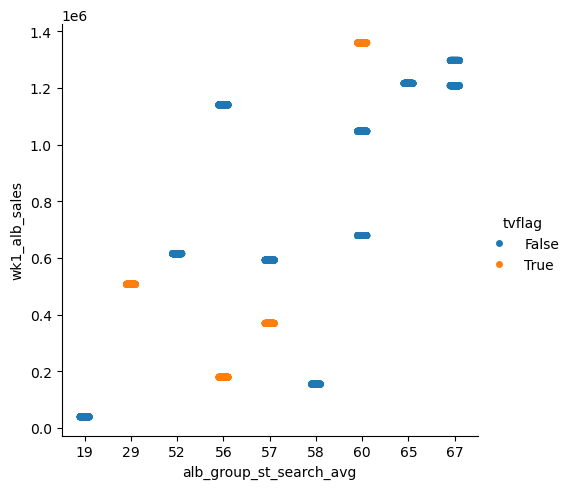

In [35]:
# Create catplot of album release day and week one sales, with release group as hue

catp = sns.catplot(x='alb_group_st_search_avg', y='wk1_alb_sales', hue='tvflag', data=alb_group)

plt.show()

In [36]:
df.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'state alb popularity group',
       'sales_group'],
      dtype='object')

NameError: name 'plt' is not defined

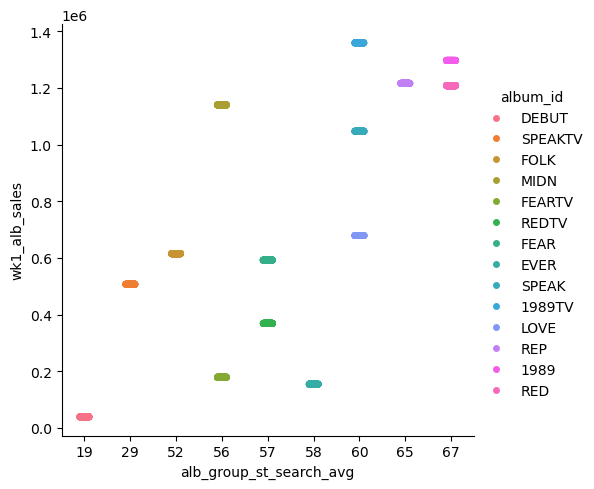

In [37]:
catp = sns.catplot(x='alb_group_st_search_avg', y='wk1_alb_sales', hue='album_id', data=df)

plt.show()

In [38]:
merge_df

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num,tv,state_num,...,pop_norm,rock_sum,rock_norm,alt_sum,alt_norm,always_ts,originals,taylorsversions,upcoming,pop_average
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,287.810,1025,256.25,487,243.5,1030.250,1346,846.8,433,61.214286
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,263.560,848,212.00,447,223.5,988.000,1022,866.8,361,52.642857
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,282.795,942,235.50,524,262.0,1065.375,1111,864.6,388,59.357143
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,299.285,1061,265.25,492,246.0,1042.625,1348,917.8,471,64.357143
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,279.550,925,231.25,494,247.0,1009.750,911,985.0,339,59.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,Virginia,59,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,47,...,273.635,892,223.00,579,289.5,1140.375,892,979.8,390,NaN
3668,Washington,63,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,48,...,303.915,1045,261.25,598,299.0,1198.375,1050,1103.2,372,NaN
3669,West Virginia,63,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,49,...,293.940,1198,299.50,486,243.0,1053.500,1449,995.2,482,NaN
3670,Wisconsin,56,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,50,...,307.695,1068,267.00,605,302.5,1199.875,1324,1007.6,398,NaN


In [39]:
merge_df.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_su

In [41]:
only_pop = merge_df.loc[merge_df['album_id'].isin(['1989', 'REP', 'LOVE', 'MIDN', '1989TV'])]

In [42]:
only_pop

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num,tv,state_num,...,pop_norm,rock_sum,rock_norm,alt_sum,alt_norm,always_ts,originals,taylorsversions,upcoming,pop_average
510,Alabama,59,1989,1989,2014-10-27,-2,81,5,original,1,...,287.810,1025,256.25,487,243.5,1030.250,1346,846.8,433,NaN
511,Alaska,52,1989,1989,2014-10-27,-2,81,5,original,2,...,263.560,848,212.00,447,223.5,988.000,1022,866.8,361,NaN
512,Arizona,61,1989,1989,2014-10-27,-2,81,5,original,3,...,282.795,942,235.50,524,262.0,1065.375,1111,864.6,388,NaN
513,Arkansas,69,1989,1989,2014-10-27,-2,81,5,original,4,...,299.285,1061,265.25,492,246.0,1042.625,1348,917.8,471,NaN
514,California,52,1989,1989,2014-10-27,-2,81,5,original,5,...,279.550,925,231.25,494,247.0,1009.750,911,985.0,339,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,Virginia,59,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,47,...,273.635,892,223.00,579,289.5,1140.375,892,979.8,390,NaN
3668,Washington,63,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,48,...,303.915,1045,261.25,598,299.0,1198.375,1050,1103.2,372,NaN
3669,West Virginia,63,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,49,...,293.940,1198,299.50,486,243.0,1053.500,1449,995.2,482,NaN
3670,Wisconsin,56,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,50,...,307.695,1068,267.00,605,302.5,1199.875,1324,1007.6,398,NaN


In [43]:
only_pop.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_su

In [44]:
only_pop['g_search_score'].mean()

61.6797385620915

In [46]:
mean_pop = only_pop.groupby('state').agg({'g_search_score':['mean']})

In [47]:
mean_pop

,g_search_score
,mean
state,
Alabama,57.888889
Alaska,52.666667
Arizona,56.703704
Arkansas,60.222222
California,55.703704
Colorado,62.777778
Connecticut,69.518519
Delaware,59.000000


In [54]:
mean_pop_sort = mean_pop.sort_values(by=('g_search_score', 'mean'), ascending = False)

In [55]:
mean_pop_sort

,g_search_score
,mean
state,
Rhode Island,89.629630
District of Columbia,83.851852
Utah,82.148148
Massachusetts,80.407407
Vermont,70.555556
New Hampshire,70.259259
Tennessee,70.111111
Connecticut,69.518519


In [56]:
merge_df

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num,tv,state_num,...,pop_norm,rock_sum,rock_norm,alt_sum,alt_norm,always_ts,originals,taylorsversions,upcoming,pop_average
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,287.810,1025,256.25,487,243.5,1030.250,1346,846.8,433,61.214286
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,263.560,848,212.00,447,223.5,988.000,1022,866.8,361,52.642857
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,282.795,942,235.50,524,262.0,1065.375,1111,864.6,388,59.357143
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,299.285,1061,265.25,492,246.0,1042.625,1348,917.8,471,64.357143
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,279.550,925,231.25,494,247.0,1009.750,911,985.0,339,59.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,Virginia,59,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,47,...,273.635,892,223.00,579,289.5,1140.375,892,979.8,390,NaN
3668,Washington,63,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,48,...,303.915,1045,261.25,598,299.0,1198.375,1050,1103.2,372,NaN
3669,West Virginia,63,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,49,...,293.940,1198,299.50,486,243.0,1053.500,1449,995.2,482,NaN
3670,Wisconsin,56,1989 (Taylor's Version),1989TV,2023-10-27,1,69,14,Taylor's Version,50,...,307.695,1068,267.00,605,302.5,1199.875,1324,1007.6,398,NaN


In [57]:
merge_df.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_su

In [60]:
merge_df['search_score_sum'] = merge_df.groupby('state')['g_search_score'].transform(np.sum)

C:\Users\leobs\AppData\Local\Temp\ipykernel_984\84440483.py:1: FutureWarning: The provided callable <function sum at 0x0000019E99132290> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  merge_df['search_score_sum'] = merge_df.groupby('state')['g_search_score'].transform(np.sum)


<Axes: xlabel='search_score_sum', ylabel='Count'>

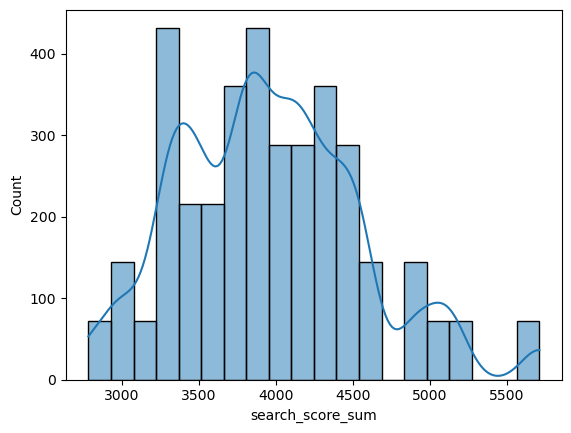

In [61]:
# Show distribution of variables to plot- originals

sns.histplot(merge_df['search_score_sum'], bins=20, kde = True) 

In [64]:
merge_df.head()

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num,tv,state_num,...,rock_sum,rock_norm,alt_sum,alt_norm,always_ts,originals,taylorsversions,upcoming,pop_average,search_score_sum
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,1025,256.25,487,243.5,1030.250,1346,846.8,433,61.214286,3780
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,848,212.00,447,223.5,988.000,1022,866.8,361,52.642857,3342
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,942,235.50,524,262.0,1065.375,1111,864.6,388,59.357143,3546
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,1061,265.25,492,246.0,1042.625,1348,917.8,471,64.357143,3909
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,925,231.25,494,247.0,1009.750,911,985.0,339,59.928571,3351


In [62]:
sorted = merge_df.sort_values(by='search_score_sum', ascending=False)

In [63]:
sorted

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num,tv,state_num,...,rock_sum,rock_norm,alt_sum,alt_norm,always_ts,originals,taylorsversions,upcoming,pop_average,search_score_sum
1773,Rhode Island,66,1989 (Taylor's Version),1989TV,2023-10-27,-1,56,14,Taylor's Version,40,...,1534,383.50,842,421.0,1747.625,1789,1325.6,651,NaN,5712
2589,Rhode Island,100,folklore,FOLK,2020-07-24,2,85,8,original,40,...,1534,383.50,842,421.0,1747.625,1789,1325.6,651,NaN,5712
3456,Rhode Island,70,Fearless,FEAR,2008-11-11,-1,64,2,original,40,...,1534,383.50,842,421.0,1747.625,1789,1325.6,651,NaN,5712
1722,Rhode Island,61,1989 (Taylor's Version),1989TV,2023-10-27,-2,47,14,Taylor's Version,40,...,1534,383.50,842,421.0,1747.625,1789,1325.6,651,NaN,5712
1569,Rhode Island,27,Speak Now (Taylor's Version),SPEAKTV,2023-07-07,0,52,13,Taylor's Version,40,...,1534,383.50,842,421.0,1747.625,1789,1325.6,651,NaN,5712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,Hawaii,40,Speak Now (Taylor's Version),SPEAKTV,2023-07-07,2,60,13,Taylor's Version,12,...,767,191.75,434,217.0,824.750,871,784.8,228,NaN,2785
2663,Hawaii,53,Lover,LOVE,2019-08-23,-1,49,7,original,12,...,767,191.75,434,217.0,824.750,871,784.8,228,NaN,2785
1592,Hawaii,20,Speak Now (Taylor's Version),SPEAKTV,2023-07-07,1,69,13,Taylor's Version,12,...,767,191.75,434,217.0,824.750,871,784.8,228,NaN,2785
3071,Hawaii,54,Red(Taylor's Version),REDTV,2021-11-12,2,66,11,Taylor's Version,12,...,767,191.75,434,217.0,824.750,871,784.8,228,NaN,2785
